In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('insurance.csv')
df2=pd.read_csv('insurance.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

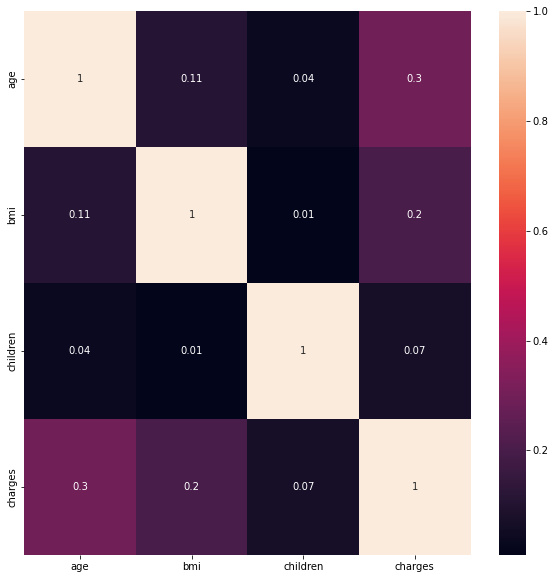

In [4]:
corr=df2.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)### 0.8이상은 빼준다

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df[df.duplicated()]### 중복값 찾기

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df[df.charges==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df=df.drop_duplicates()## 중복값 지우기!

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
obt_col=['sex','children','smoker','region']

In [11]:
for col in obt_col:
    print(col, df[col].unique())### for문으로 고유값 확인

sex ['female' 'male']
children [0 1 3 2 5 4]
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [75]:
for col in obt_col:
    print(col,df[col].value_counts())
    print('-'*9)### for문으로 value_counts 확인

sex 0    612
1    586
Name: sex, dtype: int64
---------
children 0    521
1    292
2    206
3    138
4     23
5     18
Name: children, dtype: int64
---------
smoker 0    1060
1     138
Name: smoker, dtype: int64
---------
region 2    307
1    304
0    296
3    291
Name: region, dtype: int64
---------


In [13]:
df.groupby('smoker')['charges'].median()

smoker
no      7345.72660
yes    34456.34845
Name: charges, dtype: float64

In [14]:
df.groupby('region')['charges'].median()

region
northeast    10057.652025
northwest     8976.977250
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

In [72]:
q1=df['charges'].quantile(0.25)### 4분위수

In [16]:
q3=df['charges'].quantile(0.75)

In [17]:
outlier=q3+(q3-q1)*1.5 ### 이상치 구하는 공식

In [18]:
outlier### 이상치 기준

34524.777625

In [19]:
df[df['charges']>outlier]  #### 이상치 확인하기

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [73]:
df=df[df['charges']<=outlier]### 드랍 안 쓰고 이상치 빼기 이런 것을 생각해보기

In [74]:
df['charges'].mean()

9934.671757970784

In [22]:
df['charges'].median()

8411.75495

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
col__list=['sex', 'smoker', 'region']
for col in col__list:
    label=LabelEncoder()
    label.fit(df[col].unique())
    df[col]=label.transform(df[col])

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [26]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 52, 30, 59, 63,
       55, 26, 24, 41, 38, 21, 48, 40, 58, 53, 34, 43, 64, 20, 61, 27, 44,
       57, 29, 22, 45, 35, 54, 49, 47, 51, 42, 50, 36, 39], dtype=int64)

In [27]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [28]:
df2['sex']=np.where(df2['sex']=='male',0,1)

In [29]:
df2.groupby('region')["charges"].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

In [30]:
df2['smoker']=np.where(df2['smoker']=='yes',0,1)

In [31]:
df2['region']=np.where(df2['region']=='northeast',0,
np.where(df2['region']=='northwest',1,
np.where(df2['region']=='southeast',2,3)))
                       

In [32]:
df2.groupby('smoker')['charges'].mean()

smoker
0    32050.231832
1     8434.268298
Name: charges, dtype: float64

In [33]:
df2.groupby('age')['charges'].mean()### 상관관계ㅇ

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

In [34]:
df2.groupby('age')['bmi'].median()### 상관관계ㅇ

age
18    31.3500
19    28.5000
20    30.6850
21    26.8800
22    30.7100
23    32.1450
24    28.9000
25    28.0725
26    29.5600
27    30.4500
28    29.0700
29    29.5900
30    28.6900
31    29.2600
32    30.4150
33    31.5750
34    29.7350
35    31.0000
36    29.0400
37    30.7800
38    28.2700
39    29.6000
40    29.6000
41    32.2000
42    29.0000
43    30.1000
44    30.2000
45    30.2000
46    30.4950
47    29.5450
48    31.4450
49    30.1125
50    30.1150
51    33.9150
52    32.7750
53    29.9875
54    31.0200
55    32.5325
56    32.2050
57    30.1525
58    32.9650
59    29.7000
60    29.6400
61    33.3300
62    32.0150
63    32.2000
64    33.8400
Name: bmi, dtype: float64

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pol= PolynomialFeatures(degree=2)
x_pol= pol.fit_transform(x)
x_pol

array([[ 1., 19.,  1., ...,  0.,  0.,  9.],
       [ 1., 18.,  0., ...,  1.,  2.,  4.],
       [ 1., 28.,  0., ...,  1.,  2.,  4.],
       ...,
       [ 1., 18.,  1., ...,  1.,  2.,  4.],
       [ 1., 21.,  1., ...,  1.,  3.,  9.],
       [ 1., 61.,  1., ...,  0.,  0.,  1.]])

In [ ]:
pre

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
x=df2.drop('charges',axis=1)
y=df2['charges']

In [57]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [58]:
model2=GradientBoostingRegressor() 
model2.fit(x_train,y_train)

GradientBoostingRegressor()

In [59]:
pre_train=model2.predict(x_train)

In [60]:
mean_absolute_error(pre_train,y_train)

2092.749989173236

In [61]:
pre_test=model2.predict(x_test)

In [62]:
mean_absolute_error(pre_test,y_test)

2441.5205817845094

In [63]:
model= LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
pre_train=model.predict(x_train)

In [66]:
mean_absolute_error(pre_train,y_train)

4235.3838760320905

In [67]:
pre_test=model.predict(x_test)

In [68]:
mean_absolute_error(pre_test,y_test)

3930.333273901141

In [70]:
model2.score(x_test,y_test)

0.898072547304975

In [71]:
model2.score(x_train,y_train)

0.897352642499688